# Exercise PPG Peaks

In this exercise you will estimate pulse rate using the PPG signal in the time domain. You need to recall how to estimate pulse rate using the frequency domain and this method was necessary because that PPG waveform was corrupted by motion. The PPG segment you will be provided for this exercise was collected at rest, so it is possible to see the heart beats in the time-domain as below:

![PPG Peaks](ppg_peaks.png "PPG Peaks")

Your task is to find the peaks using the [`scipy.signal.find_peaks`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function. To be successful at this task you will need to call the `find_peaks` with appropriate arguments, so you will need to experiment and read the documentation.

## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import scipy.signal
from scipy import stats
%matplotlib inline

## Load Data

In [2]:
with np.load("exercise2.npz") as npz:
    fs = npz['fs']    # The sampling rate
    ppg = npz['ppg']  # The PPG signal

## Scipy Find Peaks Stub

to find the correct peaks we will use the concept of prominence. What is prominence? It is "the minimum height necessary to descend to get from the summit to any higher terrain", as it can be seen here:
<img src="figures/image1.JPG" width="1000">

In [3]:
pks = sp.signal.find_peaks(ppg, prominence=10, height=15, distance=5)[0]

## Find Peaks

In [4]:
ts = 1./fs
time = np.array(range(0,len(ppg)))*ts

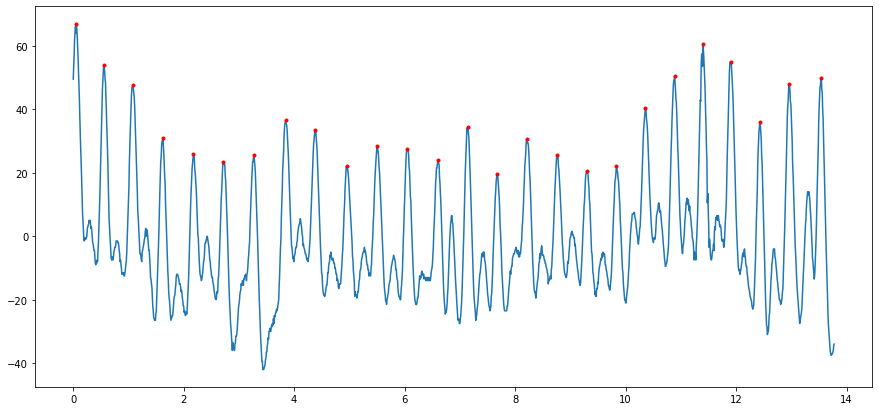

In [5]:
plt.figure(figsize=(15,7))
plt.plot(time, ppg)
plt.plot(time[pks], ppg[pks], 'r.');

## Compute Average Pulse Rate

To find the pulse rate we need to measure the difference between the peaks we found above.

In [25]:
print(f"average pulse rate is: {1/np.mean(np.diff(time[pks]))*60} [bits/min]")

average pulse rate is: 111.27596439169142 [bits/min]


**Conclusion** We were able to get the Average pulse rate only because the signal was clean.

### Compute average through Fourier spectrogram

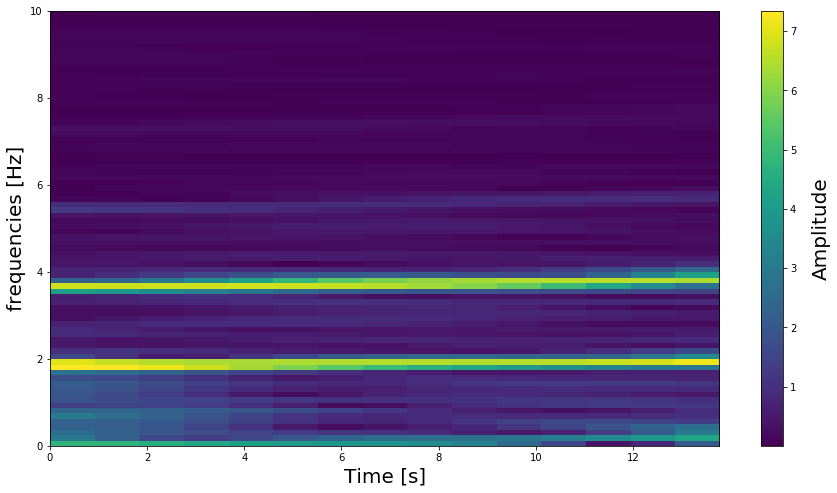

In [9]:
plt.figure(figsize=(15,8))
spec_amp,  freq, t, cax= plt.specgram(ppg, Fs=fs, NFFT=1000,noverlap=950, scale='linear', mode='magnitude', xextent=(0,time[-1]))
cbar = plt.colorbar();
cbar.ax.set_ylabel('Amplitude', rotation=90, labelpad=15, fontsize=20);
plt.ylim(0,10)
plt.xlabel('Time [s]', fontsize=20);
plt.ylabel('frequencies [Hz]', fontsize=20);

In [17]:
# Calculating the highest frequencies for each column in the spectrogram
maxFreqs = freq[np.argmax(spec_amp, axis=0)]
maxFreqs

array([1.75 , 1.75 , 1.75 , 3.625, 3.625, 3.625, 3.625, 3.625, 1.875,
       1.875, 1.875, 1.875, 1.875, 1.875, 1.875])

In [26]:
# Main frequency
fundamental_freq = stats.mode(maxFreqs)[0][0]

In [27]:
print(f"average pulse rate got from spectrogram is: {fundamental_freq*60} [bits/min]")

average pulse rate got from spectrogram is: 112.5 [bits/min]


**Conclusion** Results are similar from both approaches. However, the spectrogram will be more robust whenever we bump into a noisy signal